<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-coloring-book/blob/master/main_coloring_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Interactiv Coloring Book**


![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/coloring_book_picture.png)

**Group Members**
* Johannes Scheibe
* Thilo von Glan 
* Jill Baumann

## **Main goal**
"Create a coloring template out of a photo"

**Scenarios**
* embarrassingly colorbookly pictures
* blurred images
* high detailled images
* existing images from coloring books
* faces

**Possible User interface**
* upload the picture
* download the result
* adjust settings to get different results




**Steps**

0.   Accusation of Pictures 80%

*   We have now made some "easy to colorbook" pictures ourselves, still more could be made and "embarrassingly colorbookly" pictures from the internet may be acquired if need be.

1.   Preprocessing of picture 85%

*   We have already tried out differnt methods and decided for these:
  * Gaussian Blur
  * (Contrast)
*   We have rewriten them to enable one to call these methods like functions so one is able to use differnt filters in quick succesion. We still haven't made a final decision on which filters we want to use and when.


2.   Image Segmantation 75%

*   We have succesfully implemented our own form of the SLIC algorithim and also a well working color quantization and color replacing to segment pictures. They may yet be tuned and just like with the preprocessing methods we have to decide how we want to implement their usage. That is because their effevtiveness varies quite a bit depending on the picture. So the options here are:
  * Decide on one even if the results may be worse sometimes
  * Improve the quality of one, so that it is always better or use different methods on different parts of the picture
  * Give the User the option to choose the method of segmentation ad-hocor or do both and let the user pick in the end
  * Automaticly choose the best method for the picture

3.   Postprocessing 70%

*   After some tests we have decided that three functions could be interesting to us in the postprocessing of pictures:
  * Edge Detection
  * Canny
  * Adaptive Thresholding
  Just as with the preprocessing a final decision on what methods to use hasn't been made.

4.   Extracting Colors and assigning correct numbers to fields 30%

*   We have already succesfully reduced the amount of colors to a range of 15 different colors in a picture, so the first of these three steps is essentially done, the others we haven't really looked at yet.
  * Color standartization
  * Color detection, for each segment
  * Drawing numbers fittingly



**Next Steps**
* Face Detection

# **Loading of all Images**

In [227]:
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-FC_Valencia.png
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/car.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/clock.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/cup.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/doctor.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/bus.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/lego.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/penguin.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/soccer.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face2.JPG

--2020-01-07 20:57:58--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78308 (76K) [image/png]
Saving to: ‘Badge-Liverpool.png.1’

Badge-Liverpool.png 100%[===================>]  76.47K  --.-KB/s    in 0.008s  

2020-01-07 20:57:58 (8.92 MB/s) - ‘Badge-Liverpool.png.1’ saved [78308/78308]

--2020-01-07 20:58:00--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-FC_Valencia.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.

In [0]:
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread("Badge-Liverpool.png")
img2 = cv2.imread("Badge-FC_Valencia.png")
img3 = cv2.imread("car.JPG")
img4 = cv2.imread("cup.JPG")
img5 = cv2.imread("doctor.JPG")
img6 = cv2.imread("lego.JPG")
img7 = cv2.imread("Board-Game.jpeg")
img8 = cv2.imread("penguin.JPG")
img9 = cv2.imread("soccer.JPG")
img10 = cv2.imread("clock.JPG")
img11 = cv2.imread("bus.JPG")
img12 = cv2.imread("face1.JPG")
img13 = cv2.imread("face2.JPG")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)
img10 = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)
img11 = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
img12 = cv2.cvtColor(img12, cv2.COLOR_BGR2RGB)
img13 = cv2.cvtColor(img13, cv2.COLOR_BGR2RGB)


<function matplotlib.pyplot.show>

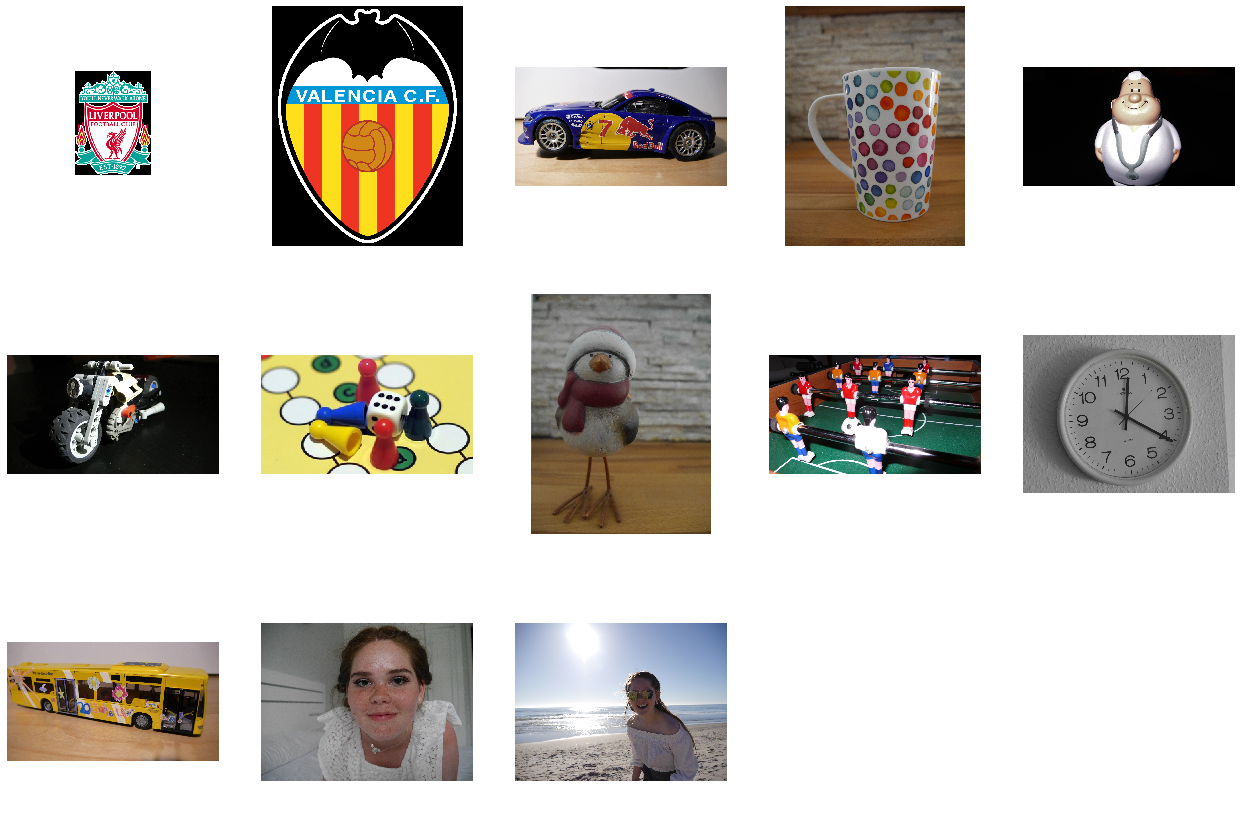

In [229]:
fig, axs = plt.subplots(3,5)
axs[0,0].imshow(img1)
axs[0,1].imshow(img2)
axs[0,2].imshow(img3)
axs[0,3].imshow(img4)
axs[0,4].imshow(img5)
axs[1,0].imshow(img6)
axs[1,1].imshow(img7)
axs[1,2].imshow(img8)
axs[1,3].imshow(img9)
axs[1,4].imshow(img10)
axs[2,0].imshow(img11)
axs[2,1].imshow(img12)
axs[2,2].imshow(img13)
[axi.set_axis_off() for axi in axs.ravel()]
fig_size = [30,20]
plt.rcParams["figure.figsize"] = fig_size
plt.show

# **Color set**



*   Red: RGB: 255,0,0 
*   Yellow: RGB: 236,226,40 
*   Green: RGB: 0,255,0 
*   Blue: RGB: 0,0,255
*   Pink: RGB: 255,0,255
*   Purple: RGB: 200,0,255
*   Light blue: RGB: 191,239,255 
*   Dark blue RGB: 25,25,112 
*   Dark Green: RGB: 0,99,0 
*   Skin: RGB: 255,229,196 
*   Brown: RGB: 140,92,43 
*   Light brown: RGB: 222,184,135 
*   Dark red: RGB: 140,0,0 
*   Gray: RGB: 204,204,204 
*   White: RGB: 255,255,255 
*   Black: RGB: 0,0,0 


In [0]:
color_set_rgb = [[255,0,0],
             [236,226,40],
             [0,255,0],
             [0,0,255],
             [255,0,255],
             [200,0,255],
             [191,239,255],
             [25,25,112],
             [0,99,0],
             [225,229,196],
             [140,92,43],
             [222,184,135],
             [140,0,0],
             [204,204,204],
             [255,255,255],
             [0,0,0]]

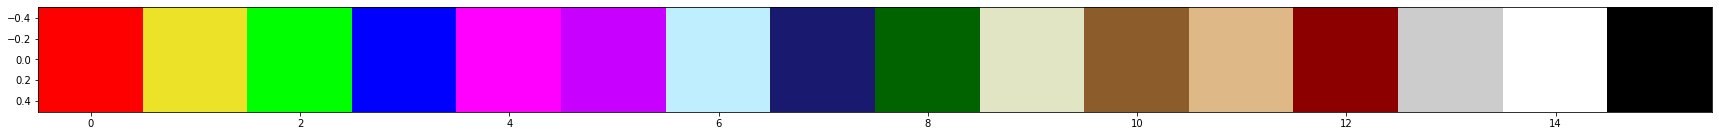

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

color_set = np.zeros([1,len(color_set_rgb), 3], dtype=np.uint8)
for i in range(0,len(color_set_rgb)):
  color_set[0][i] = color_set_rgb[i]

plt.imshow(color_set)



SLIC correct Parameters:

Board-Game
k = 400   # Number of Super pixels
m = 21.   # Constant for normalizing the color proximity

# **Preprocessing functions**

In [0]:
# A single Image is loaded into colab and returned (name)
def load_image(name):
  link = "https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/" + name
  ! wget $link
  
  img = cv2.imread(name)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return rgb

# returns an image into grayscale
def gray (img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return gray

# GaussianBlur(src, Size(i, i), deviation in X direction)
def gaussian_blur(img):
  blur = cv2.GaussianBlur(img, (9, 9), 0)
  return blur

# **Image Segmantation functions**


**Color quantization**

In [0]:
# Color quantization using k-means Clustering
# kmeans(samples, nclusters, criteria, attemps, flags)
# samples Z: Input of np.float32 data type
# nclusters K: number of clusters/ colors
# criteria: iteration termination criteria
#   (termination criteria, max_iter, epsilon)
# attemps: number of iterations - returns best result from the diffrent iterations
# flag: specifies how initial centers are choosen
# Code source: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html
def color_quantization(img):
  Z = img.reshape((-1,3))

  # convert to np.float32
  Z = np.float32(Z)

  # define criteria, number of clusters(K) and apply kmeans()
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 8
  ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  result = res.reshape((img.shape))
  return result



**Color replacing**

In [0]:
# Function, which checks if an array already contains a color
def contains_color(list1, list2):
  for e in list1:
    if e[0] == list2[0] and e[1] == list2[1] and e[2] == list2[2]:
      return True
  return False

# Get the colors which are left after quantization
def get_colors(img):
  h = img.shape[0]
  w = img.shape[1]
  colors = []
  for y in range(0, h):
    for x in range(0, w):
      if not contains_color(colors, img[y,x]):
        colors.append(img[y,x])
  return colors

# Match the colors from the color set to the colors in the picture
def match_colors(colors):
  color_set_lab = cv2.cvtColor(color_set, cv2.COLOR_RGB2LAB)
  for i in range(len(colors)):
    colors[i] = np.append(colors[i],[0,10000])
    e = colors[i]
    for j in range(0,len(color_set[0])):   
      color = color_set_lab[0][j]
      a = [color[0]/255*100,color[1]-128,color[2]-128]
      b = [e[0]/255*100,e[1]-128,e[2]-128]
      value = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2)
      if(value<e[4]):
        e[3] = j
        e[4] = value



# Replace with matched colors
def replace_colors(img, colors):
  final = img.copy()
  for e in colors:  
    mask = cv2.inRange(img, e[0:3], e[0:3])
    final[mask > 0] = color_set_lab[0][e[3]]
  final = cv2.cvtColor(final, cv2.COLOR_Lab2RGB)
  return final

# Combine all functions
def color_replacing(img):
  lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)

  picture_colors = get_colors(lab)
  match_colors(picture_colors)
  result = replace_colors(lab, picture_colors)
  return result

**Slic**

Based on: https://github.com/darshitajain/SLIC

In [0]:
# function which returns an object of class SuperPixel(height, weidth, l, a, b). Superpixels have a center(h,w) and a color(lab)
def make_superPixel(h, w,img):
    return SuperPixels(h, w,img[h,w][0],img[h,w][1],img[h,w][2])

In [0]:
# To define the initial cluster centers distanced at S
def initial_cluster_center(S,img,img_h,img_w,clusters):
    h = S // 2
    w = S // 2
    while h < img_h:
        while w < img_w:
            clusters.append(make_superPixel(h, w,img))
            w += S
        w = S // 2
        h += S
    return clusters

In [0]:
# function to calculate gradient at each pixel.
def calc_gradient(h, w,img,img_w,img_h):
    if w + 1 >= img_w:
        w = img_w - 2
    if h + 1 >= img_h:
        h = img_h - 2
    grad = img[w + 1, h + 1][0] - img[w, h][0] + img[w + 1, h + 1][1] - img[w, h][1] + img[w + 1, h + 1][2] - img[w, h][2]
    return grad

In [0]:
# function which reassign for each cluster the cluster center to the pixel having the lowest gradient
def reassign_cluster_center_acc_to_grad(clusters,img):
    for c in clusters:
        cluster_gradient = calc_gradient(c.h, c.w,img,img_w,img_h)
        for dh in range(-1, 2):
            for dw in range(-1, 2):
                H = c.h + dh
                W = c.w + dw
                new_gradient = calc_gradient(H,W, img,img_w,img_h)
                if new_gradient < cluster_gradient:
                    c.update(H, W,img[H,W][0], img[H,W][1],img[H,W][2])
                    c_gradient = new_gradient


In [0]:
#function to assign pixels to the nearest cluster using the Euclidean distance involving both color and spatial proximity.
def assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis):
    for c in clusters:
        for h in range(c.h - 2 * S, c.h + 2 * S):
            if h < 0 or h >= img_h: continue
            for w in range(c.w - 2 * S, c.w + 2 * S):
                if w < 0 or w >= img_w: continue
                l, a, b = img[h,w]
                Dc = math.sqrt(math.pow(l - c.l, 2) + math.pow(a - c.a, 2) + math.pow(b - c.b, 2))
                Ds = math.sqrt(math.pow(h - c.h, 2) + math.pow(w - c.w, 2))
                D = math.sqrt(math.pow(Dc / m, 2) + math.pow(Ds /S, 2))
                if D < dis[h,w]:
                    if (h, w) not in tag:
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    else:
                        tag[(h, w)].pixels.remove((h, w))
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    dis[h, w] = D

In [0]:
# function to replace the cluster center with the mean of the pixels contained in the cluster
def update_cluster_mean(clusters):
    for c in clusters:
        sum_h = sum_w = number = 0
        #print("c.pixels",c.pixels)
        for p in c.pixels:
            sum_h += p[0]
            sum_w += p[1]
            number += 1
            H = sum_h // number
            W = sum_w // number
            c.update(H, W,img[H, W][0], img[H, W][1], img[H, W][2])

In [0]:
# replace the color of each pixel in a cluster by the color of the cluster's center
def avg_color_cluster(img, clusters):
    image = np.copy(img)
    color_set_lab = cv2.cvtColor(color_set, cv2.COLOR_RGB2LAB)
    for c in clusters:
        for p in c.pixels:
            image[p[0],p[1]][0] = c.l
            image[p[0],p[1]][1] = c.a
            image[p[0],p[1]][2] = c.b
        # To change the color of cluster center to the matching color from the color set  
        for j in range(0,len(color_set[0])):
            color_lab = color_set_lab[0][j]
            a = [color_lab[0]/255*100,color_lab[1]-128,color_lab[2]-128]
            b = [c.l/255*100,c.a-128,c.b-128]
            value = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2)
            if(j==0):
                best_value = value
                image[c.h, c.w][0] = color_lab[0]
                image[c.h, c.w][1] = color_lab[1]
                image[c.h, c.w][2] = color_lab[2]
            elif(value<best_value):
                image[c.h, c.w][0] = color_lab[0]
                image[c.h, c.w][1] = color_lab[1]
                image[c.h, c.w][2] = color_lab[2]
                best_value = value 
    return color.lab2rgb(image)

In [0]:
# function to resize and cut the image to (400 x 400)
def resize_image(img):
    h = img.shape[0]
    w = img.shape[1]
    diff = abs(int((h - w)/2))
    if h < w:
      new_w = diff + h
      img = img[0:h, diff:new_w]
    elif h > w:
      new_h = diff + w
      img = img[diff:new_h, 0:w]
    img = resize(img, (400,400),anti_aliasing=True)
    return img

In [0]:
# A class to initialize the super pixels, of the form - [h,y,l,a,b].
class SuperPixels(object):

    def __init__(self, h, w, l=0, a=0, b=0):
        self.update(h, w, l, a, b)
        self.pixels = []

    def update(self, h, w, l, a, b):
        self.h = h
        self.w = w
        self.l = l
        self.a = a
        self.b = b

In [0]:
def slic_run(S,img,img_h,img_w,clusters,tag,dis,iter):
    clusters = initial_cluster_center(S,img,img_h,img_w,clusters)
    reassign_cluster_center_acc_to_grad(clusters,img)
    for i in range(iter): # usually the algortihm converges within 10 iterations
        assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis)
        update_cluster_mean(clusters)
        if i == (iter - 1) : # to print the output after 10 iterations
            output = avg_color_cluster(img, clusters)
    return clusters, output

**Slic-Boarders**

Based on: https://www.pyimagesearch.com/2014/07/28/a-slic-superpixel-tutorial-using-python/

In [0]:
def slic_boarder(image):
 
  # loop over the number of segments
  for numSegments in (100, 200, 300, 400,500):
	  # apply SLIC and extract (approximately) the supplied number
	  # of segments
	  segments = slic(image, n_segments = numSegments, sigma = 5)
  return segments

# **Postprocessing functions - generate colorbook picture**

**Canny**

In [0]:
# Canny(image, minVal, maxVal,  L2gradient(initial:False))
# apertureSize = size of Sobel kernel
# L2gradient = True: uses more accurate function

def canny(img):
  img = gray(img)
  canny = cv2.Canny(img, 100, 200,   L2gradient = True)
  inverted = cv2.bitwise_not(canny)
  return inverted


**Adaptive Threshold**

In [0]:
# adaptiveThreshold(img, maxValue, adaptiveMethod, tresholdType, blockSize, constant)
# maxValue: Non-zero value assigned to the pixels for which the condition is satisfied
# adativeMethod: ADAPTIVE_TRESH_MEAN_C or ADAPTIVE_TRESH_GAUSSIAN_C
# tresholdType: TRESH_BINARY or TRESH_BINARY_INV
# blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel
# constant: Constant subtracted from the mean or weighted mean
# https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
def adaptive_threshold(img):
  blur = gaussian_blur(img)
  adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 201, 8)
  inverted = cv2.bitwise_not(adaptive)
  return inverted

**Zero Crossing**

* Zero crossings is a change from negative to positive and vice-versa
* Laplacian detects the edges at zero crossings: points where the intensity of the image changes rapidly
* Task: To find zero crossings in the image
* Threshold the Laplacian output at zero

Source: https://theailearner.com/tag/zero-crossings/

In [0]:
def zero_crossing(img):
    z_c_image = np.zeros(img.shape)
    
    # For each pixel, count the number of positive
    # and negative pixels in the neighborhood
    
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [img[i+1, j-1],img[i+1, j],img[i+1, j+1],img[i, j-1],img[i, j+1],img[i-1, j-1],img[i-1, j],img[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1


            # If both negative and positive values exist in 
            # the pixel neighborhood, then that pixel is a 
            # potential zero crossing
            
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            # Change the pixel value with the maximum neighborhood
            # difference with the pixel

            if z_c:
                if img[i,j]>0:
                    z_c_image[i, j] = img[i,j] + np.abs(e)
                elif img[i,j]<0:
                    z_c_image[i, j] = np.abs(img[i,j]) + d
                
    # Normalize and change datatype to 'uint8' (optional)
    z_c_norm = z_c_image/z_c_image.max()*255
    z_c_image = np.uint8(z_c_norm)

    return z_c_image

# **Testing Playground**

--2020-01-07 20:52:36--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19390 (19K) [image/jpeg]
Saving to: ‘Board-Game.jpeg.71’

Board-Game.jpeg.71  100%[===================>]  18.94K  --.-KB/s    in 0.004s  

2020-01-07 20:52:36 (4.81 MB/s) - ‘Board-Game.jpeg.71’ saved [19390/19390]



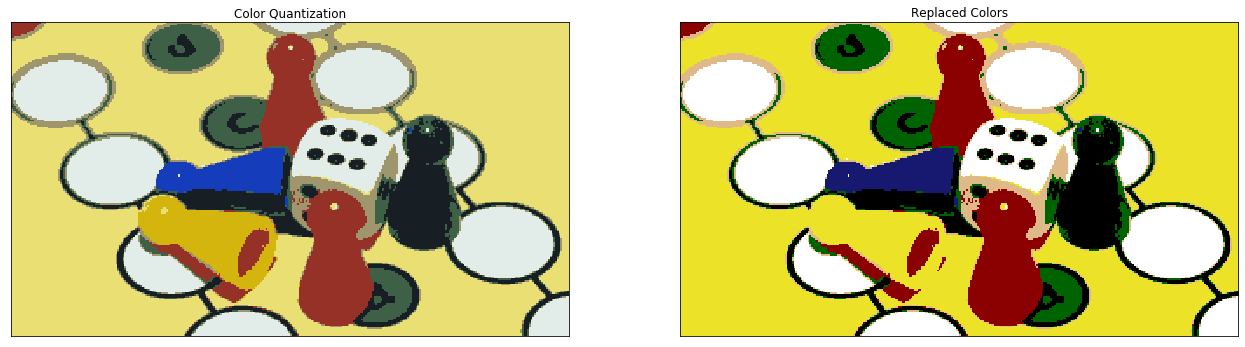

In [226]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

img = load_image("Board-Game.jpeg")

reduced = color_quantization(img)
replaced = color_replacing(reduced)
#edges = canny(replaced)


fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
images = [reduced,replaced]
titles = ['Color Quantization','Replaced Colors']
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

--2020-01-07 20:58:39--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19390 (19K) [image/jpeg]
Saving to: ‘Board-Game.jpeg.73’

Board-Game.jpeg.73  100%[===================>]  18.94K  --.-KB/s    in 0.004s  

2020-01-07 20:58:39 (4.93 MB/s) - ‘Board-Game.jpeg.73’ saved [19390/19390]

(400, 400, 3)


/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 13 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


(-0.5, 399.5, 399.5, -0.5)

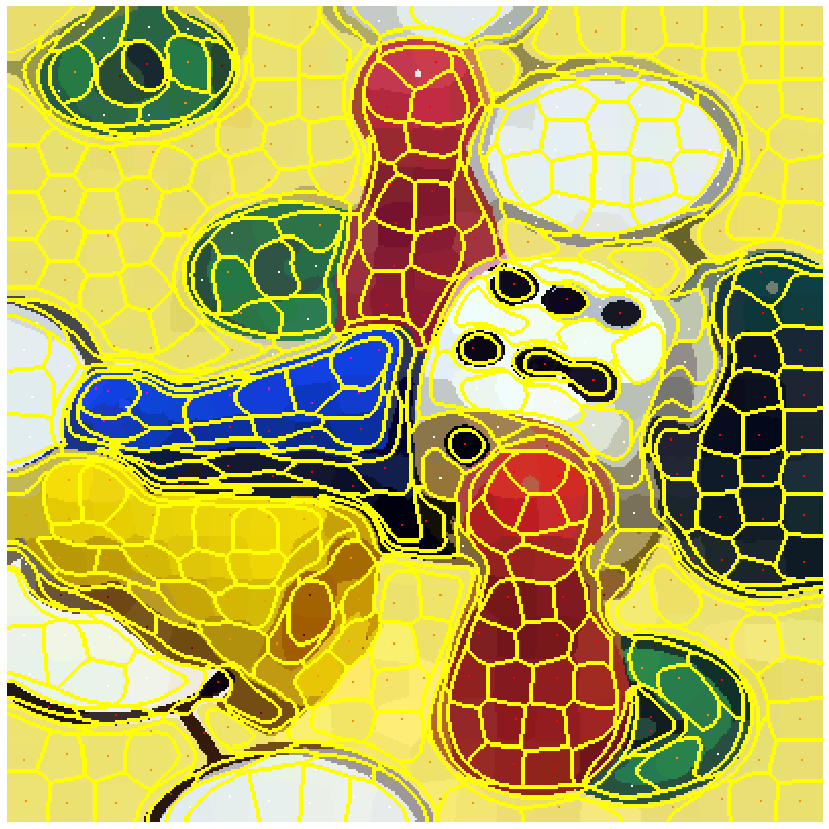

In [249]:
import math
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize
import cv2
import numpy as np
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import argparse

rgb = load_image("Board-Game.jpeg")
# input images are resized to (400 x 400) for processing
img = resize_image(rgb)
print(img.shape)

# convert RGB to LAB
img = color.rgb2lab(img)

k = 400   # Number of Super pixels
m = 21    # Constant for normalizing the color proximity, range of m = [1,40]

img_h = img.shape[0] # Image Height
img_w = img.shape[1] # Image Width

N = img_h * img_w  # Total number of pixels in the image
S = int(math.sqrt(N /k)) # average size of each superpixel

clusters = []
tag = {}
# initialize the distance between pixels and cluster center as infinity
dis = np.full((img_h, img_w), np.inf)

cluster,output = slic_run(S,img,img_h,img_w,clusters,tag,dis,7)

segments = slic_boarder(output)

fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size

fig = plt.figure("Superpixels -- %d segments" % (400))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(output, segments))
plt.axis("off")

#plt.imshow(output, cmap='gray')
#plt.title('SLIC')
#plt.xticks([]),plt.yticks([])

--2019-12-23 15:31:02--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/car.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1183247 (1.1M) [image/jpeg]
Saving to: ‘car.JPG.2’

car.JPG.2           100%[===================>]   1.13M  --.-KB/s    in 0.08s   

2019-12-23 15:31:03 (14.7 MB/s) - ‘car.JPG.2’ saved [1183247/1183247]



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

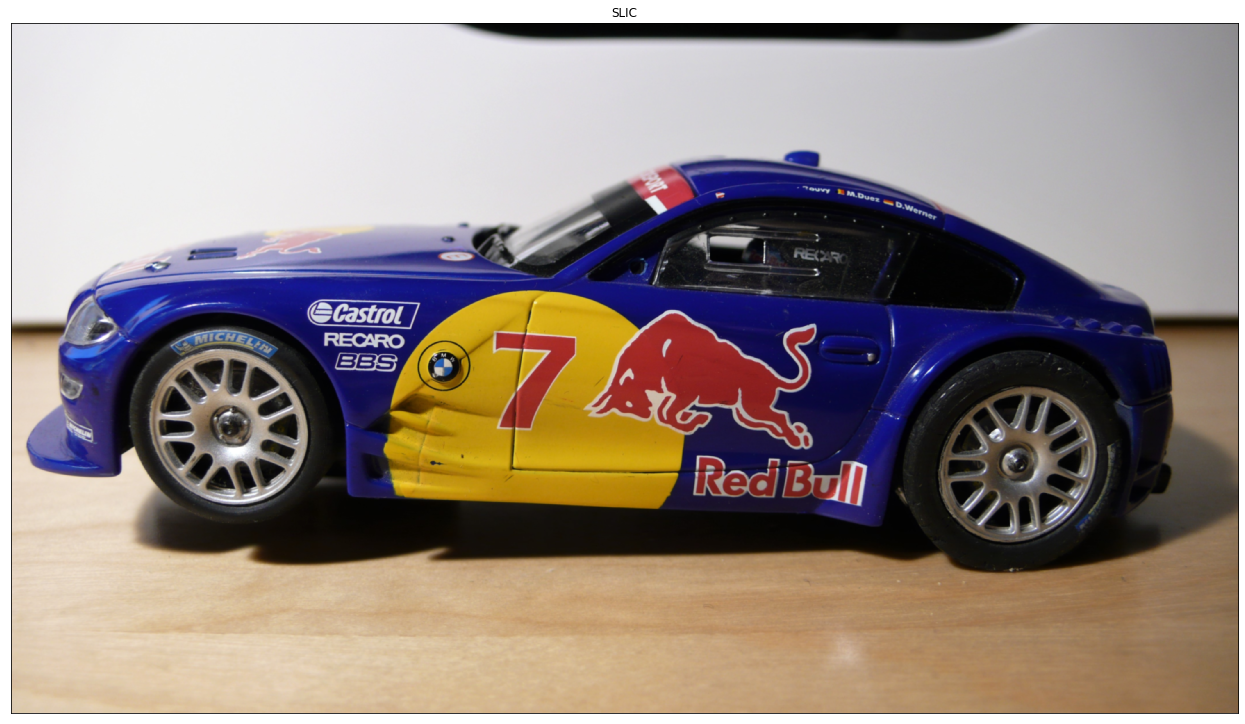

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = load_image("car.JPG")
blur = gaussian_blur(img)

gray_image = gray(blur)
threshold = adaptive_threshold(gray_image)
inv = cv2.bitwise_not(threshold)
kernel = np.ones((9,9),np.uint8)
closing = cv2.morphologyEx(inv, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((9,9),np.uint8)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
final = cv2.bitwise_not(opening)


fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
images = [img,blur,threshold,closing,opening,final]
titles = ['Image','blur','Threshold','Threshold-> Closing','Threshold-> Closing-> Opening','Threshold-> Closing-> Opening-> Inverted']
plt.imshow(images[i], cmap='gray')
plt.title('SLIC')
plt.xticks([]), plt.yticks([])

--2019-12-23 15:29:30--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/cup.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6372352 (6.1M) [application/octet-stream]
Saving to: ‘cup.JPG’

cup.JPG             100%[===================>]   6.08M  --.-KB/s    in 0.1s    

2019-12-23 15:29:30 (51.8 MB/s) - ‘cup.JPG’ saved [6372352/6372352]



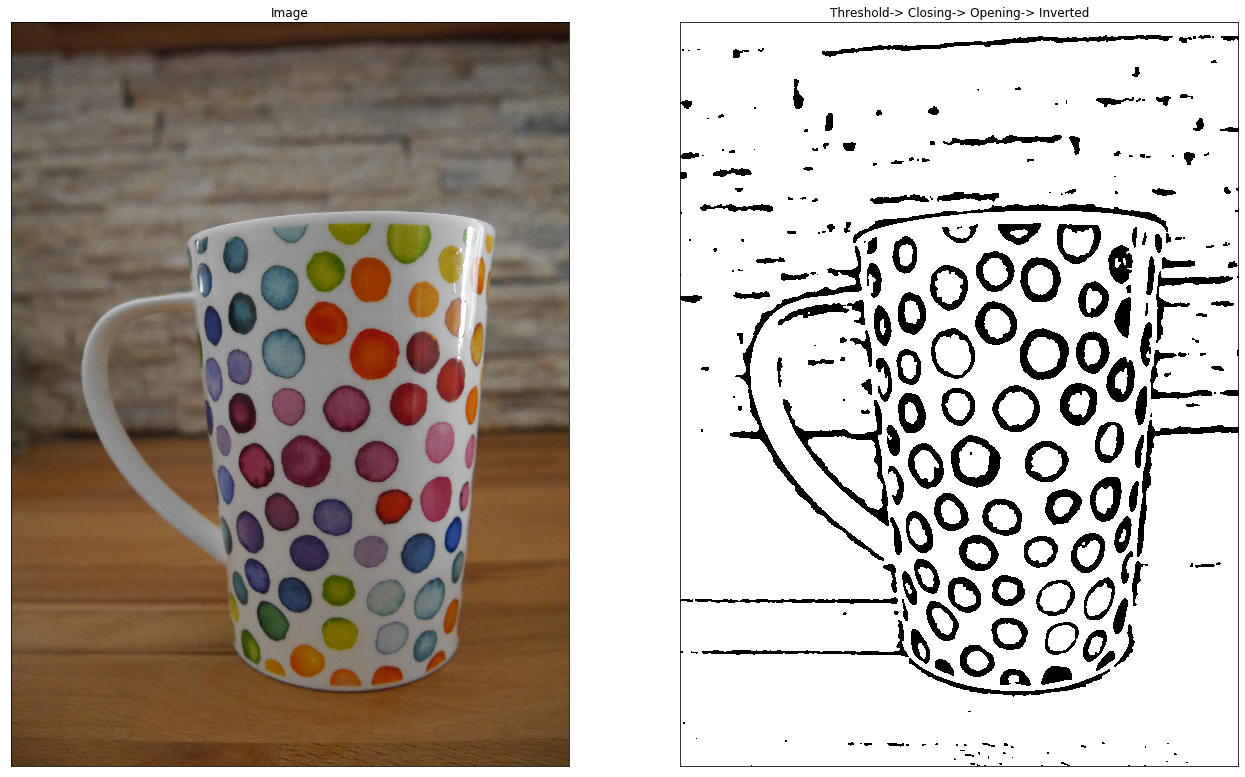

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = load_image("cup.JPG")
blur = gaussian_blur(img)

gray_image = gray(blur)
threshold = adaptive_threshold(gray_image)
inv = cv2.bitwise_not(threshold)
kernel = np.ones((9,9),np.uint8)
closing = cv2.morphologyEx(inv, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((9,9),np.uint8)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
final = cv2.bitwise_not(opening)


fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
images = [img,final]
titles = ['Image','Threshold-> Closing-> Opening-> Inverted']
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

--2019-12-23 15:30:31--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19390 (19K) [image/jpeg]
Saving to: ‘Board-Game.jpeg.5’

Board-Game.jpeg.5   100%[===================>]  18.94K  --.-KB/s    in 0.01s   

2019-12-23 15:30:31 (1.56 MB/s) - ‘Board-Game.jpeg.5’ saved [19390/19390]



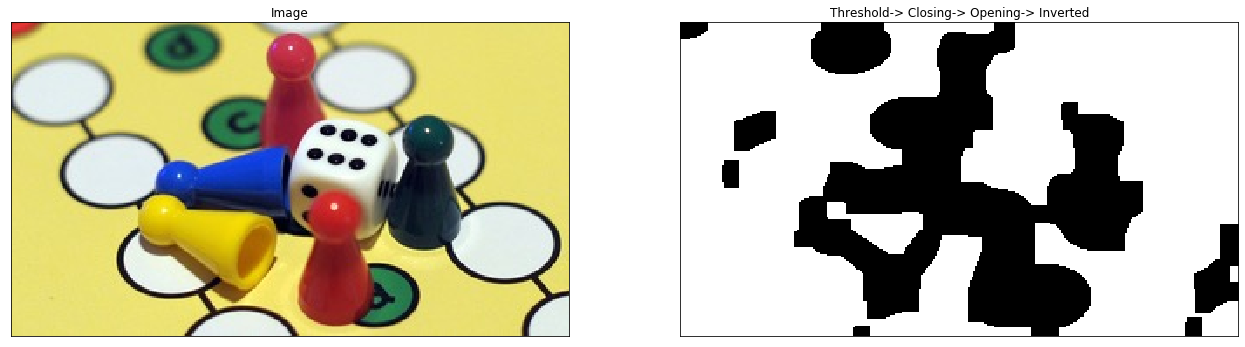

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = load_image("Board-Game.jpeg")
blur = gaussian_blur(img)

gray_image = gray(blur)
threshold = adaptive_threshold(gray_image)
inv = cv2.bitwise_not(threshold)
kernel = np.ones((9,9),np.uint8)
closing = cv2.morphologyEx(inv, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((9,9),np.uint8)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
final = cv2.bitwise_not(opening)


fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
images = [img,final]
titles = ['Image','Threshold-> Closing-> Opening-> Inverted']
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

**Alternativer Ansatz**

--2019-12-16 20:25:34--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19390 (19K) [image/jpeg]
Saving to: ‘Board-Game.jpeg.2’

Board-Game.jpeg.2   100%[===================>]  18.94K  --.-KB/s    in 0.01s   

2019-12-16 20:25:34 (1.58 MB/s) - ‘Board-Game.jpeg.2’ saved [19390/19390]



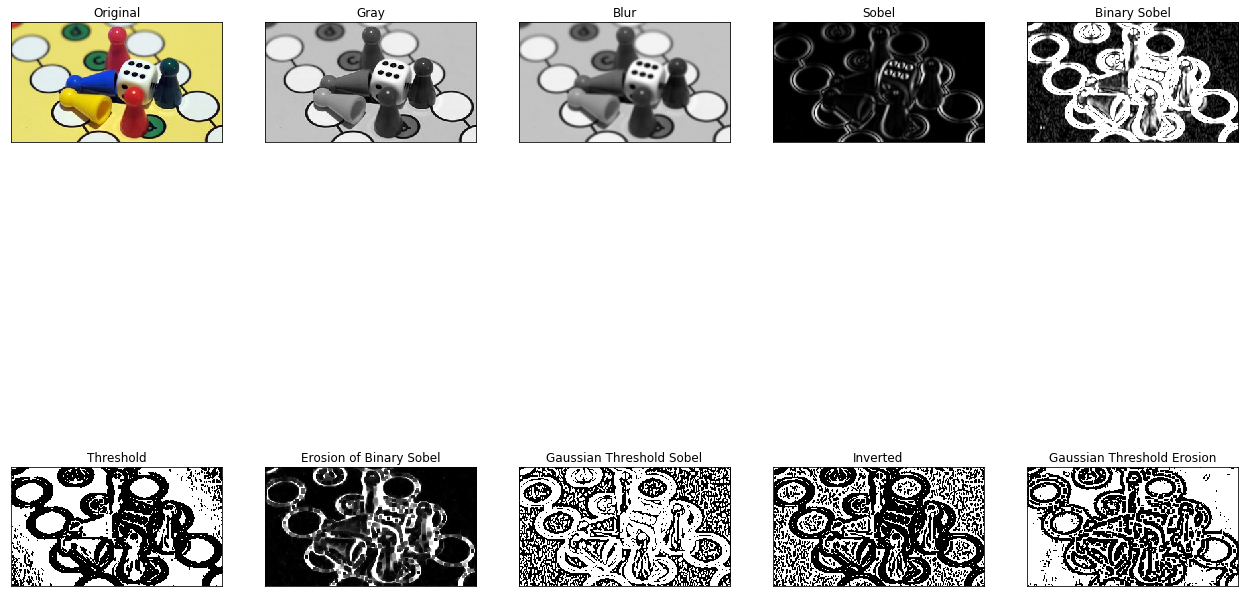

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = load_image("Board-Game.jpeg")
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
b = cv2.GaussianBlur(g, (5, 5), 1.4)

sy = cv2.Sobel(b, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
sx = cv2.Sobel(b, ddepth=cv2.CV_64F,dx=1, dy=0, ksize=5)
sob = np.hypot(sx,sy)

sobel = cv2.convertScaleAbs(sob)
#g2 = cv2.cvtColor(sobel, cv2.COLOR_BGR2GRAY)

t = cv2.adaptiveThreshold(sobel, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 201, 8)
kernel = np.ones((5,5),np.uint8)
e = cv2.erode(sobel,kernel,iterations = 1)
t2 = cv2.adaptiveThreshold(sobel,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
t3 = cv2.adaptiveThreshold(e,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

inv = cv2.bitwise_not(t2)

fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
images = [img, g, b, sob, sobel, t, e, t2, inv, t3]
titles = ['Original','Gray','Blur', 'Sobel', 'Binary Sobel', 'Threshold', 'Erosion of Binary Sobel', 'Gaussian Threshold Sobel', 'Inverted', 'Gaussian Threshold Erosion']
for i in range(10):
    plt.subplot(2,5,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

--2019-12-17 07:53:30--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19390 (19K) [image/jpeg]
Saving to: ‘Board-Game.jpeg.10’

Board-Game.jpeg.10  100%[===================>]  18.94K  --.-KB/s    in 0.01s   

2019-12-17 07:53:30 (1.52 MB/s) - ‘Board-Game.jpeg.10’ saved [19390/19390]



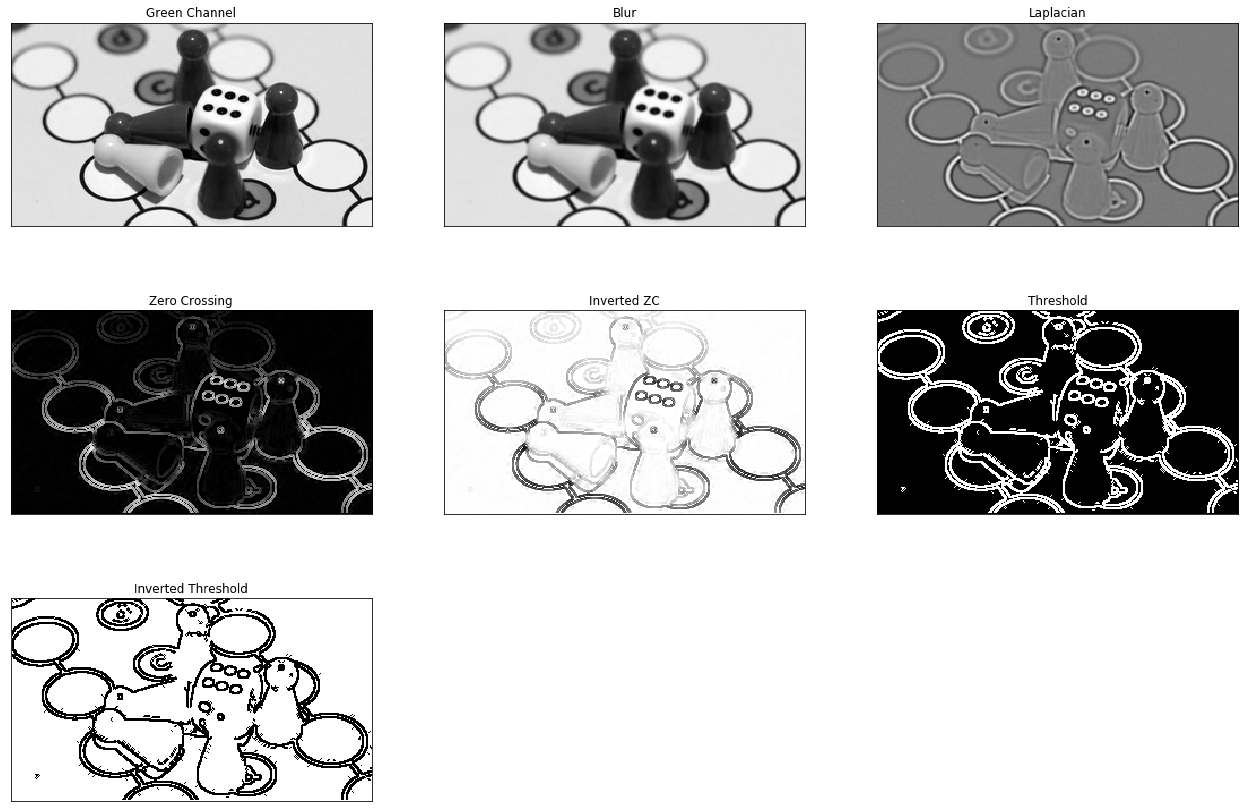

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = load_image("Board-Game.jpeg")
green_channel = img[:,:,1]
img_blur = cv2.GaussianBlur(green_channel, (3,3),0)
l = cv2.Laplacian(img_blur,cv2.CV_64F, ksize=5)

zc = zero_crossing(l)
inv = cv2.bitwise_not(zc)
t = cv2.adaptiveThreshold(inv, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 201, 8)
inv2 = cv2.bitwise_not(t)



fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
images = [green_channel, img_blur, l, zc, inv, t, inv2]
titles = ['Green Channel', 'Blur', 'Laplacian', 'Zero Crossing', 'Inverted ZC', 'Threshold', 'Inverted Threshold']
for i in range(7):
    plt.subplot(3,3,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

## **Face**

--2019-12-03 21:20:39--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6521344 (6.2M) [application/octet-stream]
Saving to: ‘face1.JPG.4’

face1.JPG.4         100%[===================>]   6.22M  --.-KB/s    in 0.07s   

2019-12-03 21:20:39 (88.2 MB/s) - ‘face1.JPG.4’ saved [6521344/6521344]



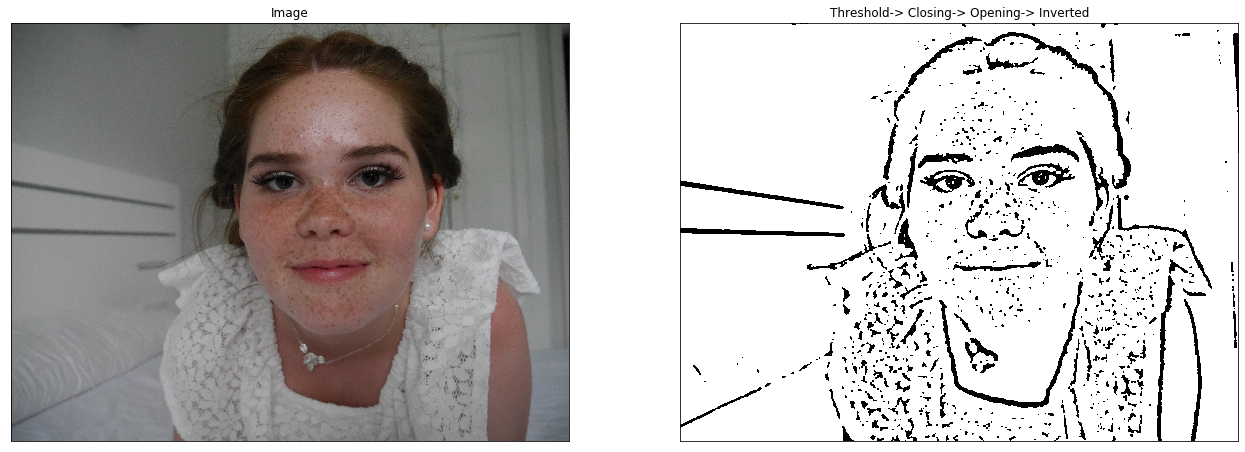

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = load_image("face1.JPG")
blur = gaussian_blur(img)

gray_image = gray(blur)
threshold = adaptive_threshold(gray_image)
inv = cv2.bitwise_not(threshold)
kernel = np.ones((9,9),np.uint8)
closing = cv2.morphologyEx(inv, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((9,9),np.uint8)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
final = cv2.bitwise_not(opening)


fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
images = [img,final]
titles = ['Image','Threshold-> Closing-> Opening-> Inverted']
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

**Landmarks**

Source: https://www.analytics-link.com/single-post/2019/07/17/Mapping-Facial-Landmarks-in-Python-using-OpenCV

In [0]:
! pip install dlib
! pip install cmake
! pip install opencv-python
! pip install imutils


In [0]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 "shape_predictor_68_face_landmarks.dat.bz2"



--2020-01-03 16:26:34--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  17.5MB/s    in 5.9s    

2020-01-03 16:26:40 (10.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



--2020-01-03 12:42:25--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6521344 (6.2M) [application/octet-stream]
Saving to: ‘face1.JPG.1’

face1.JPG.1         100%[===================>]   6.22M  32.4MB/s    in 0.2s    

2020-01-03 12:42:25 (32.4 MB/s) - ‘face1.JPG.1’ saved [6521344/6521344]



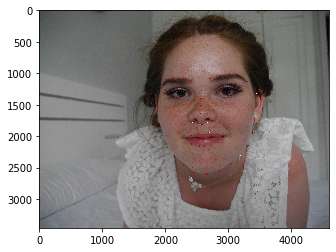

In [0]:
import cv2
import dlib
import matplotlib.pyplot as plt

# set up the 68 point facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# bring in the input image
img = load_image("face1.JPG")

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces_in_image = detector(img_gray, 0)

# loop through each face in image
for face in faces_in_image:

	# assign the facial landmarks
	landmarks = predictor(img_gray, face)

	# unpack the 68 landmark coordinates from the dlib object into a list 
	landmarks_list = []
	for i in range(0, landmarks.num_parts):
		landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))

	# for each landmark, plot and write number
	for landmark_num, xy in enumerate(landmarks_list, start = 1):
		cv2.circle(img, (xy[0], xy[1]), 12, (168, 0, 20), -1)
		cv2.putText(img, str(landmark_num),(xy[0]-7,xy[1]+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,255,255), 1)


# visualise the image with landmarks
plt.imshow(img)


--2020-01-03 16:38:48--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6521344 (6.2M) [application/octet-stream]
Saving to: ‘face1.JPG.4’

face1.JPG.4         100%[===================>]   6.22M  --.-KB/s    in 0.04s   

2020-01-03 16:38:48 (150 MB/s) - ‘face1.JPG.4’ saved [6521344/6521344]



Text(0.5, 1.0, 'Polygon')

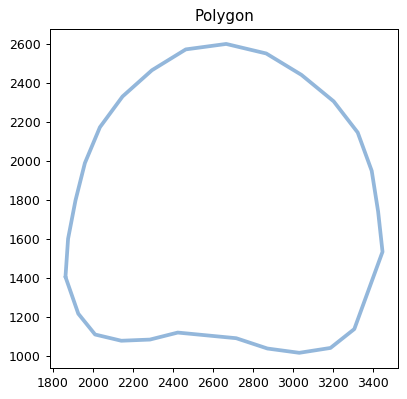

In [0]:
from shapely import geometry
import cv2
import dlib
import matplotlib.pyplot as plt

# set up the 68 point facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# bring in the input image
img = load_image("face1.JPG")

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces_in_image = detector(img_gray, 0)

# loop through each face in image
for face in faces_in_image:

  # assign the facial landmarks
  landmarks = predictor(img_gray, face)

  # unpack the 68 landmark coordinates from the dlib object into a list 
  landmarks_list = []
  for i in range(0, 16):
    landmarks_list.append(geometry.Point(landmarks.part(i).x, landmarks.part(i).y))
  for i in range(0, 10):
    landmarks_list.append(geometry.Point(landmarks.part(26-i).x, landmarks.part(26-i).y))
	


# visualise the image with landmarks
fig = plt.figure(1, figsize=(5,5), dpi=90)
poly = geometry.Polygon([[p.x, p.y] for p in landmarks_list])
x,y = poly.exterior.xy
ax = fig.add_subplot(111)
ax.plot(x, y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
ax.set_title('Polygon')

--2020-01-03 17:36:05--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6521344 (6.2M) [application/octet-stream]
Saving to: ‘face1.JPG.46’

face1.JPG.46        100%[===================>]   6.22M  --.-KB/s    in 0.05s   

2020-01-03 17:36:05 (133 MB/s) - ‘face1.JPG.46’ saved [6521344/6521344]



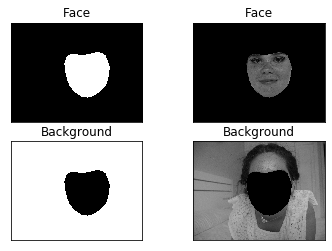

In [0]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy
from PIL import Image, ImageDraw, ImageOps

# set up the 68 point facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# bring in the input image
img = load_image("face1.JPG")

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces_in_image = detector(img_gray, 0)

# loop through each face in image
for face in faces_in_image:

  # assign the facial landmarks
  landmarks = predictor(img_gray, face)

  # unpack the 68 landmark coordinates from the dlib object into a list 
  landmarks_list = []
  for i in range(0, 16):
    landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))
  for i in range(0, 10):
    landmarks_list.append((landmarks.part(26-i).x, landmarks.part(26-i).y))



polygon = landmarks_list

height = img.shape[0]
width = img.shape[1]

mask = Image.new('L', (width, height), 0)
ImageDraw.Draw(mask).polygon(polygon, outline=1, fill=1)
mask = numpy.array(mask)
face = img_gray * mask

inv_mask = (1-mask)
background = img_gray * inv_mask

images = [mask,face,inv_mask,background]
titles = ['Face','Face','Background','Background']
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])


# **Edge detection** 



Canny(image, minVal, maxVal,  L2gradient(initial:False))

apertureSize = size of Sobel kernel

L2gradient = True: uses more accurate function

***Example 1: Bladge Liverpool***

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
liverpool = cv2.imread("Badge-Liverpool.png")
liverpool = cv2.cvtColor(liverpool, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(liverpool, 100, 200,   L2gradient = True)
inverted = cv2.bitwise_not(edges)

fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(131)
plt.imshow(liverpool,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(inverted,cmap = 'gray')
plt.title('Inverted')
plt.xticks([]), plt.yticks([])

***Example 3: Statue of Liberty***

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
statue = cv2.imread("P1100010.JPG")
statue = cv2.cvtColor(statue, cv2.COLOR_BGR2RGB)
statue_edges = cv2.Canny(statue, 100, 200,   L2gradient = True)

statue_edges = cv2.bitwise_not(statue_edges)

fig_size = [18,12]
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(121)
plt.imshow(statue,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(statue_edges,cmap = 'gray')
plt.title('Inverted Edge Image')
plt.xticks([]), plt.yticks([])

* reducing the colors of an image to a specific number
* using k-means(clustering algorthm)

# **Deep Learning Edge Detection**

Sources: 
* https://www.pyimagesearch.com/2019/03/04/holistically-nested-edge-detection-with-opencv-and-deep-learning/
* https://github.com/opencv/opencv/blob/master/samples/dnn/edge_detection.py
* https://github.com/s9xie/hed

In [0]:
# import the necessary packages
import argparse
import cv2
import os
 
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--edge-detector", type=str, required=True,
	help="path to OpenCV's deep learning edge detector")
ap.add_argument("-i", "--image", type=str, required=True,
	help="path to input image")
ap.add_argument("--pretrained_model", default=os.path.join(pycaffe_dir,
                "../models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel"),
        help="Trained model weights file."
    )
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -d EDGE_DETECTOR -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -d/--edge-detector, -i/--image


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
class CropLayer(object):
	def __init__(self, params, blobs):
		# initialize our starting and ending (x, y)-coordinates of
		# the crop
		self.startX = 0
		self.startY = 0
		self.endX = 0
		self.endY = 0

In [0]:
	def getMemoryShapes(self, inputs):
		# the crop layer will receive two inputs -- we need to crop
		# the first input blob to match the shape of the second one,
		# keeping the batch size and number of channels
		(inputShape, targetShape) = (inputs[0], inputs[1])
		(batchSize, numChannels) = (inputShape[0], inputShape[1])
		(H, W) = (targetShape[2], targetShape[3])
 
		# compute the starting and ending crop coordinates
		self.startX = int((inputShape[3] - targetShape[3]) / 2)
		self.startY = int((inputShape[2] - targetShape[2]) / 2)
		self.endX = self.startX + W
		self.endY = self.startY + H
 
		# return the shape of the volume (we'll perform the actual
		# crop during the forward pass
		return [[batchSize, numChannels, H, W]]

In [0]:
def forward(self, inputs):
	# use the derived (x, y)-coordinates to perform the crop
	return [inputs[0][:, :, self.startY:self.endY,self.startX:self.endX]]

In [0]:
# load our serialized edge detector from disk
print("[INFO] loading edge detector...")
protoPath = os.path.sep.join([args["edge_detector"],
	"deploy.prototxt"])
modelPath = os.path.sep.join([args["edge_detector"],
	"hed_pretrained_bsds.caffemodel"])
net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)
 
# register our new layer with the model
cv2.dnn_registerLayer("Crop", CropLayer)

In [0]:
# load the input image and grab its dimensions
image = cv2.imread("Board-Game.jpeg")
(H, W) = image.shape[:2]
 
# convert the image to grayscale, blur it, and perform Canny
# edge detection
print("[INFO] performing Canny edge detection...")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
canny = cv2.Canny(blurred, 30, 150)

In [0]:
# construct a blob out of the input image for the Holistically-Nested
# Edge Detector
blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(W, H),
	mean=(104.00698793, 116.66876762, 122.67891434),
	swapRB=False, crop=False)

# set the blob as the input to the network and perform a forward pass
# to compute the edges
print("[INFO] performing holistically-nested edge detection...")
net.setInput(blob)
hed = net.forward()
hed = cv2.resize(hed[0, 0], (W, H))
hed = (255 * hed).astype("uint8")

# show the output edge detection results for Canny and
# Holistically-Nested Edge Detection
cv2.imshow("Input", image)
cv2.imshow("Canny", canny)
cv2.imshow("HED", hed)
cv2.waitKey(0)